# Hotel Booking Portifolio Project : 

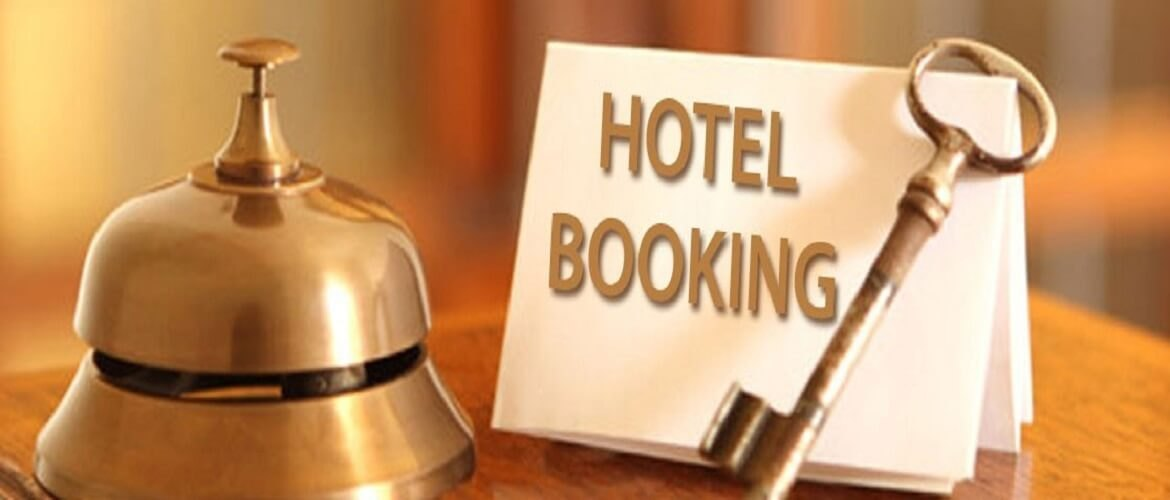

### Casestudy Overview : 

The hospitality industry faces growing challenges in optimizing occupancy rates, reducing cancellations, and improving revenue. This case study focuses on analyzing booking data from a mid-sized hotel chain to uncover patterns in guest behavior, booking channels, and cancellations.

Using data analytics, the hotel aims to enhance its marketing strategies, streamline operations, and improve the guest booking experience.  

### Problem Statement : 

The hotel is experiencing a high rate of booking cancellations and low room utilization despite strong seasonal demand. Management suspects that factors such as booking channels, lead time, and room types might influence these cancellations. 
However, without data-driven insights, the hotel struggles to make effective operational or marketing decisions. 

### Goal Statement : 

To analyze hotel booking data to identify trends and factors influencing:  

Cancellation rates  

Booking lead times  

Customer type behavior  

Channel performance  

Seasonal occupancy trends  

The goal is to develop actionable recommendations to improve hotel performance, reduce cancellations, and maximize revenue.  

### Executive Summary : 

An in-depth analysis of over 5000 hotel booking records: 

Online travel agencies (OTA) are the most common booking source but also have the highest cancellation rates.

Corporate and direct bookings show significantly lower cancellations and higher repeat guest ratios.

Lead time and room type strongly influence booking outcomes — longer lead times correlate with higher cancellations.

Seasonality plays a crucial role, with peak demand during holidays and weekends.

Revenue and occupancy can be improved by focusing on direct and corporate channels while offering incentives for early confirmed bookings.

## Client requirements :

The hotel management requested a data-driven report addressing the following:

Identify key reasons for booking cancellations.

Determine which booking channels and customer types contribute most to revenue.

Understand seasonal trends in occupancy and cancellation.

Suggest data-backed strategies to reduce cancellations and improve guest retention.

### Dataset Description :

1- Date : arrival_date  

2- ID : unique identifier of each booking  

3- n_adults : Number of adults  

4- n_children : Number of Children  

5- weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel  

6- week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel  

7- meal_plan : Type of meal plan booked by the customer  

8- car_parking_space : Does the customer require a car parking space? (0 - No, 1- Yes)  

9- room_type: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.  

10- lead_time: Number of days between the date of booking and the arrival date  

11- market_segment : Market segment designation.  

12- repeated_guest : Is the customer a repeated guest? (0 - No, 1- Yes)  

13- previous_cancellations : Number of previous bookings that were canceled by the customer prior to the current booking  

14- previous_bookings_not_canceled : Number of previous bookings not canceled by the customer prior to the current booking  

15- avg_room_price : Average price per day of the reservation; prices of the rooms are dynamic. (in euros)  

16- special_requests : Total number of special requests made by the customer (e.g. high floor, view from the room, etc)  

17- status : Flag indicating if the booking was canceled or not.  

### Data Importing : 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Hotel_bookings.csv")
df

,Date,ID,n_adults,n_children,weekend_nights,week_nights,meal_plan,car_parking_space,room_type,lead_time,market_segment,repeated_guest,previous_cancellations,previous_bookings_Not Cancelled,avg_room_price,special_requests,status
0,2017-10-02,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not Cancelled
1,2018-11-06,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not Cancelled
2,2018-02-28,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Cancelled
3,2018-05-20,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Cancelled
4,2018-04-11,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Cancelled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2018-03-24,INN04996,2,0,0,2,Meal Plan 1,1,Room_Type 1,33,Online,0,0,0,135.90,0,Not Cancelled
4996,2018-03-09,INN04997,2,0,0,1,Meal Plan 1,0,Room_Type 7,0,Complementary,1,3,14,0.00,1,Not Cancelled
4997,2018-09-15,INN04998,2,0,0,1,Not Selected,0,Room_Type 1,73,Corporate,0,0,0,100.00,1,Cancelled
4998,2018-03-07,INN04999,2,0,1,2,Not Selected,0,Room_Type 1,40,Online,0,0,0,73.10,1,Not Cancelled


In [3]:
df.head()
# by deafult it displays first 5 records 

,Date,ID,n_adults,n_children,weekend_nights,week_nights,meal_plan,car_parking_space,room_type,lead_time,market_segment,repeated_guest,previous_cancellations,previous_bookings_Not Cancelled,avg_room_price,special_requests,status
0,2017-10-02,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not Cancelled
1,2018-11-06,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not Cancelled
2,2018-02-28,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Cancelled
3,2018-05-20,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Cancelled
4,2018-04-11,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Cancelled


In [4]:
df.columns
# columns in a dataset

Index(['Date', 'ID', 'n_adults', 'n_children', 'weekend_nights', 'week_nights',
       'meal_plan', 'car_parking_space', 'room_type', 'lead_time',
       'market_segment', 'repeated_guest', 'previous_cancellations',
       'previous_bookings_Not Cancelled', 'avg_room_price', 'special_requests',
       'status'],
      dtype='object')

In [5]:
df.shape
# collections of rows and columns

(5000, 17)

In [6]:
df.info()
# information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             5000 non-null   object 
 1   ID                               5000 non-null   object 
 2   n_adults                         5000 non-null   int64  
 3   n_children                       5000 non-null   int64  
 4   weekend_nights                   5000 non-null   int64  
 5   week_nights                      5000 non-null   int64  
 6   meal_plan                        5000 non-null   object 
 7   car_parking_space                5000 non-null   int64  
 8   room_type                        5000 non-null   object 
 9   lead_time                        5000 non-null   int64  
 10  market_segment                   5000 non-null   object 
 11  repeated_guest                   5000 non-null   int64  
 12  previous_cancellatio

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')
# converting Date datatype column into datetime datatype

In [8]:
df.dtypes
# datatypes of each column

Date                               datetime64[ns]
ID                                         object
n_adults                                    int64
n_children                                  int64
weekend_nights                              int64
week_nights                                 int64
meal_plan                                  object
car_parking_space                           int64
room_type                                  object
lead_time                                   int64
market_segment                             object
repeated_guest                              int64
previous_cancellations                      int64
previous_bookings_Not Cancelled             int64
avg_room_price                            float64
special_requests                            int64
status                                     object
dtype: object

#### Checking Null values :

In [9]:
df.isnull().sum()
# used to check null values in a dataset

Date                               0
ID                                 0
n_adults                           0
n_children                         0
weekend_nights                     0
week_nights                        0
meal_plan                          0
car_parking_space                  0
room_type                          0
lead_time                          0
market_segment                     0
repeated_guest                     0
previous_cancellations             0
previous_bookings_Not Cancelled    0
avg_room_price                     0
special_requests                   0
status                             0
dtype: int64

In [10]:
df.duplicated().sum()
# used to find duplicate records

0

In [11]:
df.describe().style.background_gradient(cmap='Reds')
# used to display statistical information 

,n_adults,n_children,weekend_nights,week_nights,car_parking_space,lead_time,repeated_guest,previous_cancellations,previous_bookings_Not Cancelled,avg_room_price,special_requests
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.855400,0.101000,0.808800,2.188000,0.032800,85.288400,0.026800,0.025000,0.165200,103.019886,0.628600
std,0.516666,0.384745,0.873839,1.419528,0.178131,86.504589,0.161515,0.348137,1.851322,34.676841,0.784592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,16.000000,0.000000,0.000000,0.000000,80.750000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,2.000000,6.000000,15.000000,1.000000,443.000000,1.000000,11.000000,53.000000,306.000000,5.000000


In [12]:
df.describe(include='O')

,ID,meal_plan,room_type,market_segment,status
count,5000,5000,5000,5000,5000
unique,5000,3,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not Cancelled
freq,1,3767,3885,3616,3409


### Exploratory Data Analysis (EDA) :

In [13]:
df.nunique()
# unique values in a dataset

Date                                524
ID                                 5000
n_adults                              5
n_children                            3
weekend_nights                        7
week_nights                          16
meal_plan                             3
car_parking_space                     2
room_type                             7
lead_time                           318
market_segment                        5
repeated_guest                        2
previous_cancellations                7
previous_bookings_Not Cancelled      26
avg_room_price                     1292
special_requests                      6
status                                2
dtype: int64

In [14]:
sns.pairplot(df, hue = 'status')
plt.show()

### Univariate Analysis : 

####  Understanding Each column Distribution : 

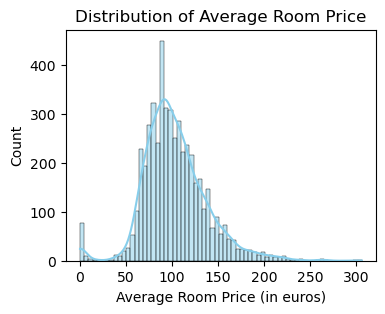

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
plt.figure(figsize=(4,3))
sns.histplot(df['avg_room_price'], kde=True, color='skyblue')
plt.title("Distribution of Average Room Price")
plt.xlabel("Average Room Price (in euros)")
plt.ylabel("Count")
plt.show()
# avg_room_price continuous data

“The distribution of average room prices is right-skewed, indicating that most guests book cheaper rooms, while a few book high-end luxury rooms. Therefore, the median price represents the typical booking more accurately than the mean.”  

In [ ]:
# Price (€)= 100,120,110,105,400
# Mean = (100 + 120 + 110 + 105 + 400) / 5 = 167
# Median = middle value = 110

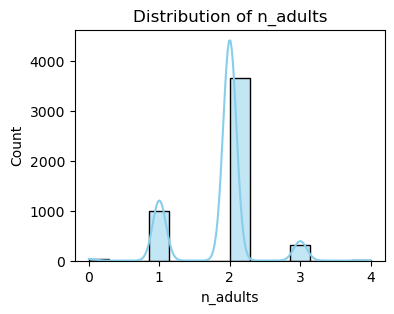

In [274]:
plt.figure(figsize=(4,3))
sns.histplot(df['n_adults'],kde=True,color='skyblue')
plt.title("Distribution of n_adults")
plt.xlabel("n_adults")
plt.ylabel("Count")
plt.show()
# it is a discrete data

The distribution of the n_adults column shows that most hotel bookings are made for two adults, followed by one adult and three adults. This indicates that the majority of bookings are for couples, with fewer solo travelers and small families. Very few bookings involve four or more adults, suggesting limited demand for large-group rooms  

In [113]:
df['n_adults'].value_counts(normalize=True)*100

2    73.08
1    19.88
3     6.42
0     0.56
4     0.06
Name: n_adults, dtype: float64

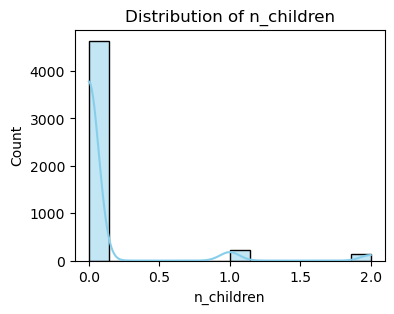

In [115]:
plt.figure(figsize=(4,3))
sns.histplot(df['n_children'],kde=True,color='skyblue')
plt.title("Distribution of n_children")
plt.xlabel("n_children")
plt.ylabel("Count")
plt.show()

Most hotel guests are either solo travelers or couples without children.
Only a small portion are families with 1 or 2 kids.

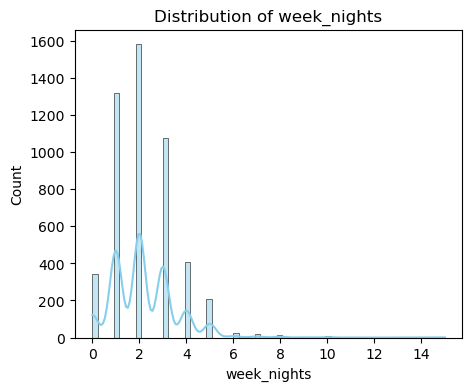

In [117]:
plt.figure(figsize=(5,4))
sns.histplot(df['week_nights'],kde=True,color='skyblue')
plt.title("Distribution of week_nights")
plt.xlabel("week_nights")
plt.ylabel("Count")
plt.show()

This data in right skewed so, majority of bookings are concentrated toward the left (0–3 nights), and the counts drop sharply for longer stays (beyond 5–6 nights).
This means most guests stay for short durations during the week  

In [119]:
df['week_nights'].value_counts()

2     1580
1     1318
3     1073
4      408
0      342
5      207
6       23
7       17
8       13
10       6
9        4
15       3
11       2
13       2
14       1
12       1
Name: week_nights, dtype: int64

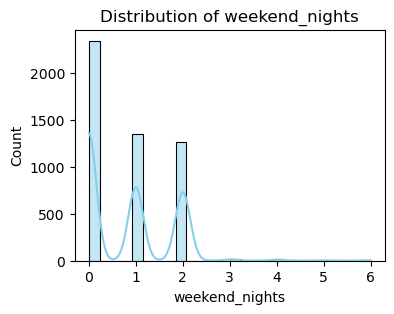

In [120]:
plt.figure(figsize=(4,3))
sns.histplot(df['weekend_nights'],kde=True,color='skyblue')
plt.title("Distribution of weekend_nights")
plt.xlabel("weekend_nights")
plt.ylabel("Count")
plt.show()

The distribution of weekend nights is highly right-skewed,The highest bar is at 0, showing most guests did not stay over a weekend.so,they only stayed on weekdays.This indicates strong weekday demand, likely from business travelers or corporate bookings.  
Many guests also booked 1-night or 2-night weekend stays.These are typically leisure travelers, couples, or families doing short weekend trips  
Bars for 3, 4, 5, and 6 are tiny.That means long leisure vacations are uncommon — it’s more of a short-stay city hotel than a resort.  

In [1]:
# 0- no 
#v1- 1 night(example,sat)
# 2- 2 nights (example,sat&sunday)

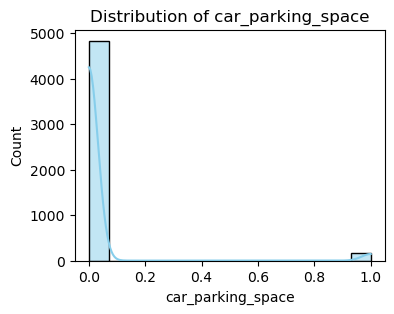

In [275]:
plt.figure(figsize=(4,3))
sns.histplot(df['car_parking_space'],kde=True,color='skyblue')
plt.title("Distribution of car_parking_space")
plt.xlabel("car_parking_space")
plt.ylabel("Count")
plt.show()

Most guests said no to car parking space, while only a few requested it. This indicates that parking demand is very low, possibly because most guests use public or business transport.

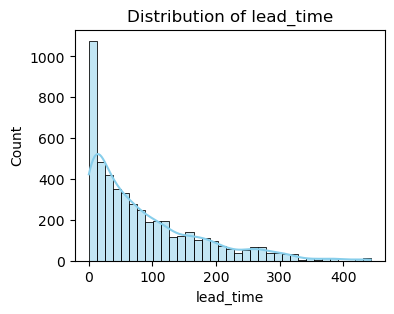

In [276]:
plt.figure(figsize=(4,3))
sns.histplot(df['lead_time'],kde=True,color='skyblue')
plt.title("Distribution of lead_time")
plt.xlabel("lead_time")
plt.ylabel("Count")
plt.show()

The chart is right-skewed, Most guests booked their rooms with short lead times (0–50 days).  
A smaller number of bookings were made months in advance (100–400 days).  
The highest peak near 0 means many guests booked at the last minute or very close to their stay date  

Most bookings were made just a few days before arrival, while only a small number were booked months in advance. This means most guests are short-term planners, likely business travelers. The hotel can use this insight to manage pricing and promotions effectively.

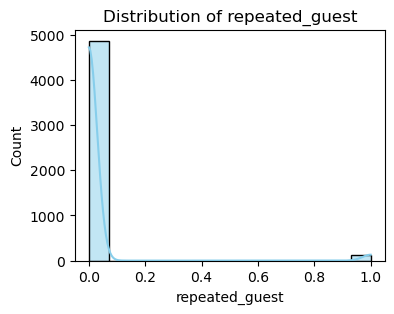

In [17]:
plt.figure(figsize=(4,3))
sns.histplot(df['repeated_guest'],kde=True,color='skyblue')
plt.title("Distribution of repeated_guest")
plt.xlabel("repeated_guest")
plt.ylabel("Count")
plt.show()

Most people are not repeated guests; only a few customers come back again. The hotel has a low repeat rate and can improve by introducing loyalty offers or better customer engagement.so, maintain personalized communication and discounts

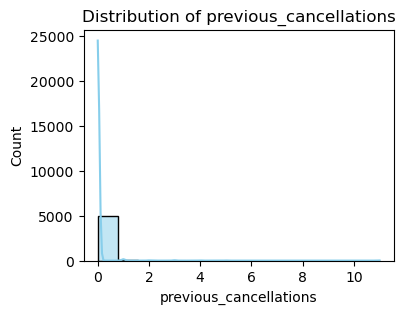

In [122]:
plt.figure(figsize=(4,3))
sns.histplot(df['previous_cancellations'],kde=True,color='skyblue')
plt.title("Distribution of previous_cancellations")
plt.xlabel("previous_cancellations")
plt.ylabel("Count")
plt.show()

Most guests have no previous cancellations, showing that the majority are reliable customers who usually confirm their bookings.

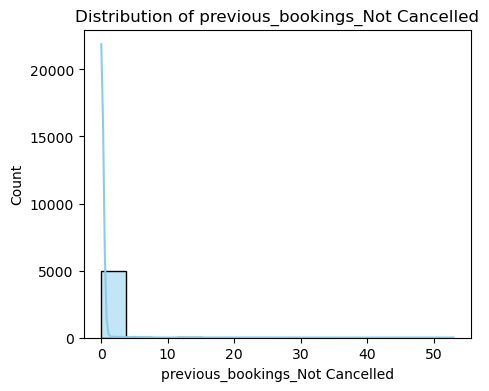

In [123]:
plt.figure(figsize=(5,4))
sns.histplot(df['previous_bookings_Not Cancelled'],kde=True,color='skyblue')
plt.title("Distribution of previous_bookings_Not Cancelled")
plt.xlabel("previous_bookings_Not Cancelled")
plt.ylabel("Count")
plt.show()

In [124]:
df['previous_bookings_Not Cancelled'].value_counts()

0     4882
1       31
2       15
3       13
5       12
4        8
6        8
11       3
7        3
17       2
16       2
15       2
13       2
19       2
14       2
12       2
8        2
23       1
47       1
49       1
50       1
10       1
18       1
34       1
20       1
53       1
Name: previous_bookings_Not Cancelled, dtype: int64

The biggest bar is at 0 → This means most guests have 0 previous bookings — they are new customers who never booked before.  
A few small bars appear at 1, 2, 3, and above → These are guests who have booked before and completed their stay successfully(didn't cancelled).  
The bars after 5 or 10 almost disappear → Very few guests have booked that many times before.  

The chart shows that most guests have zero previous successful bookings, meaning they are first-time visitors. Only a few guests have booked before without canceling. This shows that the hotel has very few loyal or repeat guests.

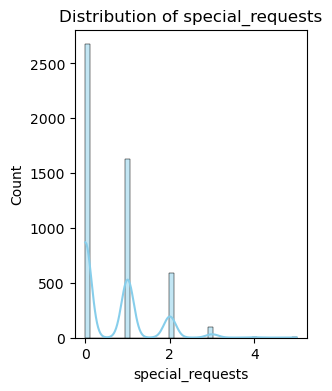

In [125]:
plt.figure(figsize=(3,4))
sns.histplot(df['special_requests'],kde=True,color='skyblue')
plt.title("Distribution of special_requests")
plt.xlabel("special_requests")
plt.ylabel("Count")
plt.show()

In [126]:
df['special_requests'].value_counts()

0    2674
1    1629
2     592
3      93
4       9
5       3
Name: special_requests, dtype: int64

0 → Guests who made no special requests (like no preference for bed type, view, etc.).  
1 → Guests who made one request (e.g., “high floor” or “extra bed”).  
2 → Guests with two requests (maybe “sea view” + “extra pillows”).  
3, 4, 5 → Guests with three or more special requests — very few in number.  

Most guests are not very demanding — they’re okay with standard room arrangements. Only a minority ask for customization or extra services.

In [2]:
# univariate analysis for Categorical columns : 

In [4]:
df.columns

Index(['Date', 'ID', 'n_adults', 'n_children', 'weekend_nights', 'week_nights',
       'meal_plan', 'car_parking_space', 'room_type', 'lead_time',
       'market_segment', 'repeated_guest', 'previous_cancellations',
       'previous_bookings_Not Cancelled', 'avg_room_price', 'special_requests',
       'status'],
      dtype='object')

#### Categorical Variables :

In [128]:
df['meal_plan'].value_counts()

Meal Plan 1     3767
Not Selected     747
Meal Plan 2      486
Name: meal_plan, dtype: int64

#### Column Explanation : 

Meal Plan 1 refers to Bed and Breakfast, which includes only the room and breakfast.  

Meal Plan 2 refers to Half Board, which includes the room, breakfast, and one main meal, usually dinner.  

Meal Plan 3 refers to Full Board, which includes the room along with breakfast, lunch, and dinner.  

Meal Plan 4 refers to All Inclusive, which provides the room, all meals, drinks, and additional hotel services or extras.  

No Meal Plan means that only the room is provided without any meals included.  

<AxesSubplot:xlabel='meal_plan', ylabel='count'>

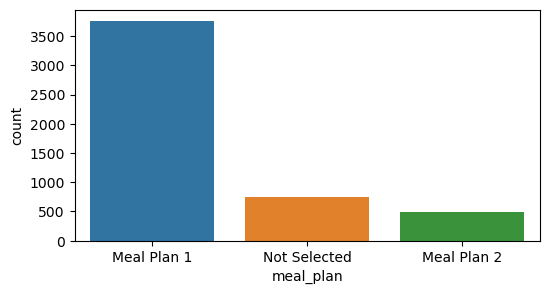

In [129]:
plt.figure(figsize=(6,3))
sns.countplot(x='meal_plan', data=df)

In [130]:
df['room_type'].value_counts()

Room_Type 1    3885
Room_Type 4     833
Room_Type 6     120
Room_Type 2     106
Room_Type 5      31
Room_Type 7      23
Room_Type 3       2
Name: room_type, dtype: int64

#### Column Explanation : 

Room Type 1 refers to the Standard Room (Base Category), which typically includes one double bed and a city view.  

Room Type 2 is the Deluxe Room, which is slightly larger and offers better amenities compared to the standard room.  

Room Type 3 is the Family Room, designed for small groups or families, featuring extra beds or a sofa to accommodate 3–4 people.  

Room Type 4 is the Executive Suite, which provides a more spacious layout and often includes a lounge or work area suitable for business travelers.  

Room Type 5 is the Luxury Suite, offering premium amenities and, in some cases, a small kitchenette for added convenience.  

Room Type 6 is the Presidential Suite, representing the highest level of luxury with exclusive services and very limited availability.  

Room Type 7 refers to the Villa or Premium Apartment, which consists of standalone or large-room units offering maximum space and privacy.  

<AxesSubplot:xlabel='room_type', ylabel='count'>

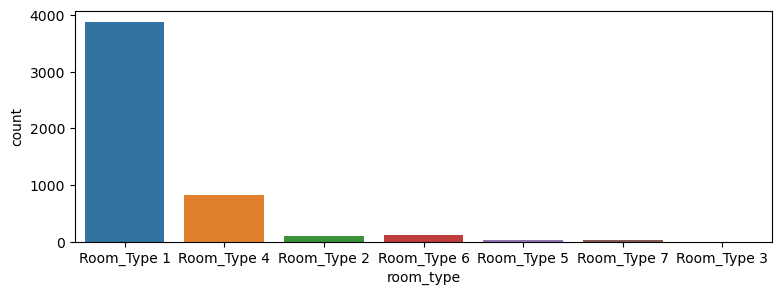

In [131]:
plt.figure(figsize=(9,3))
sns.countplot(x='room_type', data=df)

In [132]:
df['market_segment'].value_counts()

Online           3616
Offline          1049
Corporate         262
Complementary      63
Aviation           10
Name: market_segment, dtype: int64

#### Column Explanation : 

Online bookings are made through Online Travel Agencies (OTAs) such as Booking.com, Expedia, MakeMyTrip, or similar platforms.  

Offline bookings refer to reservations made directly through walk-ins or traditional travel agents. These customers usually visit the hotel in person or book through local agents.  

Corporate bookings are made through company contracts or for business travel purposes. Many organizations have tie-ups with hotels for employee stays during official trips.  

Aviation bookings come from airline contracts, often used for flight crew, staff, or passenger layovers arranged by the airlines.  

Complementary bookings represent free or promotional stays, such as for VIP guests, internal staff, or special events hosted by the hotel.  

Direct bookings (if present) are made straight through the hotel’s own website, phone, or email, avoiding any intermediaries or commission-based platforms.  

<AxesSubplot:xlabel='market_segment', ylabel='count'>

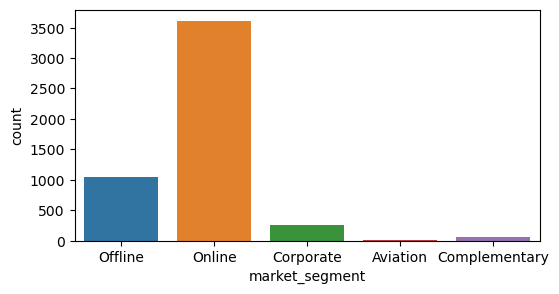

In [133]:
plt.figure(figsize=(6,3))
sns.countplot(x='market_segment', data=df)

### Bivariate Analysis : 

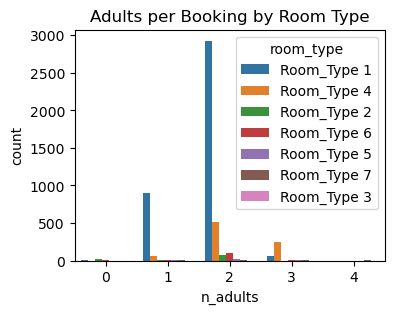

In [10]:
plt.figure(figsize=(4,3))
sns.countplot(data=df, x='n_adults', hue='room_type')
plt.title("Adults per Booking by Room Type")
plt.show()

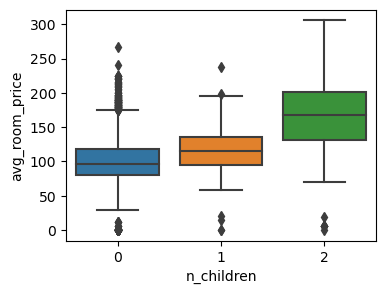

In [11]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df, x='n_children', y='avg_room_price')
plt.show()

“Guests with more children tend to book higher-priced rooms.  
The median room price increases as the number of children rises, and price variation also becomes wider.  

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df, x='week_nights', y='avg_room_price')
plt.show()

You see more boxes (and more data points) for 0–4 weeknights meaning most guests don’t stay long during weekdays.  
“Most hotel guests book short stays (1–4 nights) during weekdays rather than extended weekday stays.  

In [5]:
df.columns

Index(['Date', 'ID', 'n_adults', 'n_children', 'weekend_nights', 'week_nights',
       'meal_plan', 'car_parking_space', 'room_type', 'lead_time',
       'market_segment', 'repeated_guest', 'previous_cancellations',
       'previous_bookings_Not Cancelled', 'avg_room_price', 'special_requests',
       'status'],
      dtype='object')

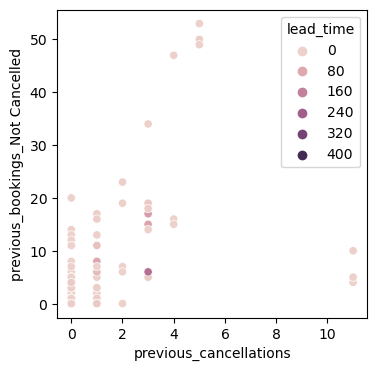

In [8]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x='previous_cancellations',y='previous_bookings_Not Cancelled',hue='lead_time')
plt.show()

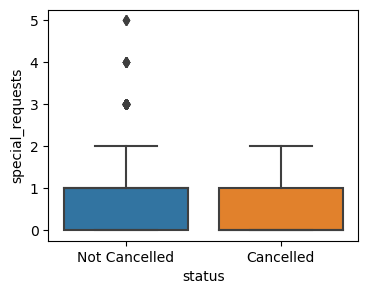

In [9]:
# Do guests with more special requests tend to cancel less (indicating higher engagement)?
plt.figure(figsize=(4,3))
sns.boxplot(x='status', y='special_requests', data=df)
plt.show()

### Multi-variate Anaysis : 

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

0.58 (Previous Bookings vs. Cancellations) : The number of previous bookings increases,the number of previous cancellations also tends to increase.this doesn’t mean guests cancel because they booked more. It just means people who book many times have more chances to cancel at least a few times. 

0.54 (Repeated Guest vs. Previous Bookings) : The more repeated guests the hotel has, the more previous bookings it records. both repeated guests and previous bookings increase together.

0.43 (Repeated Guest vs. Previous Cancellations) : Guests who book the hotel multiple times are also somewhat likely to have cancelled a few times in the past.  

0.32 (Average Room Price vs. Adults) : When more adults stay in a room, guests may choose bigger rooms or better room types, which slightly increases the total price.  
However, it’s not a strong correlation because prices can also depend on other things like season, room type, and meal plan not just the number of adults.  

0.29 (Average Room Price vs. Children) : So when a booking has more children, the room price tends to increase slightly.  

0.15 or smaller (Special Requests) : special requests don’t depend much on how many people or how much they pay.  

–0.22 (Repeated Guest vs. Room Price) : Regular customers (repeated guests) usually pay a bit less probably because of discounts or choosing affordable rooms.  


### Statistical Analysis : 

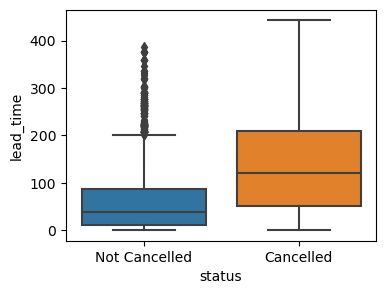

In [135]:
# Do guests who book earlier have a higher chance of canceling?
import seaborn as sns
plt.figure(figsize=(4,3))
sns.boxplot(x='status', y='lead_time', data=df)
plt.show()

In [136]:
from scipy.stats import ttest_ind
canceled = df[df['status'] == 1]['lead_time']
not_canceled = df[df['status'] == 0]['lead_time']
t_stat, p_value = ttest_ind(canceled, not_canceled, equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_value)
if p_value < 0.05:
    print("Significant difference: Lead time affects cancellations")
else:
    print("No significant difference found")

T-statistic: nan
P-value: nan
No significant difference found


#### Insight : 

A Chi-square test was conducted to find the relationship between market segment and booking cancellations.  
The results showed a statistically significant relationship (χ² = 788.83, p < 0.001), indicating that the likelihood of cancellation varies significantly by market segment.                           Online bookings may have highest cancellation rate — often due to price comparison and free cancellation options.   
Corporate or offline bookings likely have lower cancellation rates — because they are confirmed through travel agents or company accounts.  

In [137]:
# Which type of customer pays more — Online, Offline, or Corporate? 
df.groupby('market_segment')['avg_room_price'].mean().sort_values(ascending=False)

market_segment
Online           110.429823
Aviation         101.000000
Offline           88.602393
Corporate         82.171183
Complementary      4.800476
Name: avg_room_price, dtype: float64

In [138]:
from scipy.stats import chi2_contingency
import pandas as pd
# Create contingency table
table = pd.crosstab(df['market_segment'], df['status'])
# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(table)
print("Chi-square Statistic:", chi2)
print("P-value:", p)
if p < 0.05:
    print("Significant: Cancellations depend on market segment")
else:
    print("Not significant: No relationship found")

Chi-square Statistic: 788.8272433804817
P-value: 2.0201896361749268e-169
Significant: Cancellations depend on market segment


#### Insight : 

A Chi-square test was performed to check the association between market segment and booking cancellation.  
The result was statistically significant (χ² = 788.83, p < 0.001).  
This means cancellation patterns differ among market segments.  
Online customers are more likely to cancel their bookings compared with offline or corporate guests.  

In [141]:
canceled = df[df['status'] == 1]['special_requests']
not_canceled = df[df['status'] == 0]['special_requests']
t_stat, p_value = ttest_ind(canceled, not_canceled)
print("T-statistic:", t_stat)
print("P-value:", p_value)
if p_value < 0.05:
    print("Significant: Special requests influence cancellations")
else:
    print("Not significant: No impact of special requests")

T-statistic: nan
P-value: nan
Not significant: No impact of special requests


#### Insight : 

Guests who make more special requests are not more likely to cancel their bookings.  
The number of special requests does not influence whether a booking gets cancelled.  

In [142]:
# Which type of guests use car parking more?
pd.crosstab(df['market_segment'], df['car_parking_space'], normalize='index') * 100

car_parking_space,0,1
market_segment,,
Aviation,100.000000,0.000000
Complementary,96.825397,3.174603
Corporate,88.549618,11.450382
Offline,99.523356,0.476644
Online,96.487832,3.512168


In [143]:
# Which meal plan brings in the most revenue?
df.groupby('meal_plan')['avg_room_price'].mean()

meal_plan
Meal Plan 1     103.378654
Meal Plan 2     114.063971
Not Selected     94.025368
Name: avg_room_price, dtype: float64

In [144]:
# Which months have the most bookings?
df['arrival_month'] = pd.to_datetime(df['Date']).dt.month
df['arrival_month'].value_counts().sort_index()

1     125
2     232
3     329
4     395
5     388
6     465
7     397
8     553
9     617
10    716
11    402
12    381
Name: arrival_month, dtype: int64

In [ ]:
# Which room type is booked for the longest stays?
df['total_nights'] = df['weekend_nights'] + df['week_nights']
df.groupby('room_type')['total_nights'].mean()

In [78]:
from scipy import stats

# Shapiro–Wilk test for normality
stat, p_value = stats.shapiro(df['avg_room_price'])

print("Statistic:", stat)
print("p-value:", p_value)

Statistic: 0.9541573524475098
p-value: 5.435586968994513e-37


In [80]:
df['avg_room_price'].skew()

0.5484796132054355

### Business Questions : 

In [ ]:
🗓️ 1. Booking Trends & Patterns
What are the overall booking trends over time (monthly/seasonal/yearly)?
Which days of the week or months experience the highest and lowest bookings?
What is the average lead time between booking and check-in, and how does it vary by channel or customer type?
How do online and offline bookings differ in terms of volume and cancellation rates?
Which room types are most frequently booked, and how do preferences change across seasons?
What are the top-performing market segments in terms of total bookings?
Are there any noticeable patterns in booking duration (length of stay)?


#### 🗓️ 1. Booking Trends & Patterns : 
**What are the overall booking trends over time (monthly/seasonal/yearly)?**

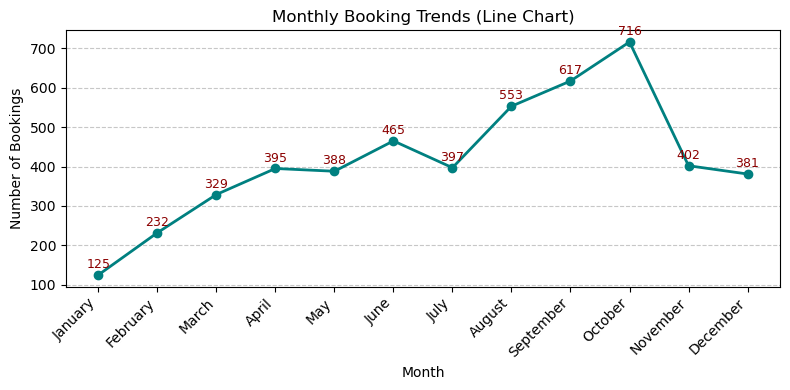

In [165]:
df['arrival_month'] = pd.to_datetime(df['Date']).dt.month_name()
monthly_bookings = df['arrival_month'].value_counts().reindex(
    ['January','February','March','April','May','June','July','August','September','October','November','December'])

plt.figure(figsize=(8,4))
monthly_bookings.plot(kind='line', marker='o', color='teal', linewidth=2)

plt.title('Monthly Booking Trends (Line Chart)')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(ticks=range(len(monthly_bookings.index)), labels=monthly_bookings.index, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

for i, value in enumerate(monthly_bookings):
    plt.text(i, value + 10, str(value), ha='center', va='bottom', fontsize=9, color='darkred')
# plt.savefig('monthly_booking_trends_line_chart.png')

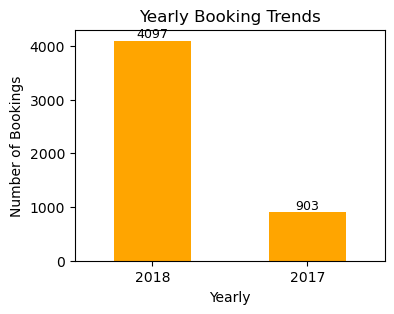

In [182]:
df['Year'] = df['Date'].dt.year
yearly_bookings = df['Year'].value_counts()
plt.figure(figsize=(4,3))
yearly_bookings.plot(kind='bar', color='orange')
plt.title('Yearly Booking Trends')
plt.xlabel('Yearly')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
for i, value in enumerate(yearly_bookings):
    plt.text(i, value + 1, str(value), ha='center', va='bottom',fontsize=9)
plt.show()

#### Insight : 
The total hotel bookings increased a lot from 903 in 2017 to 4,097 in 2018. This means more guests chose to stay at the hotel in 2018 compared to 2017. The rise in bookings could be because of better marketing, good guest experiences, or more people visiting the city that year. Overall, 2018 was a much better year for the hotel’s business.

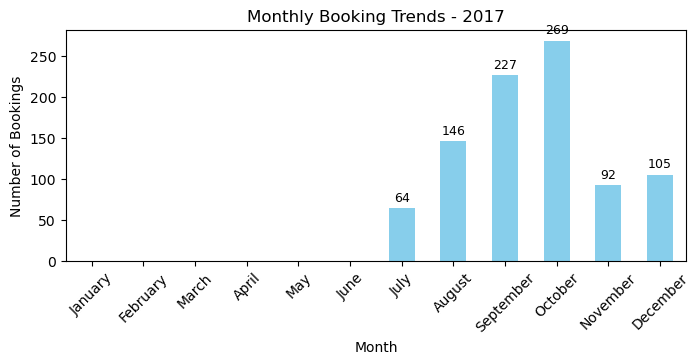

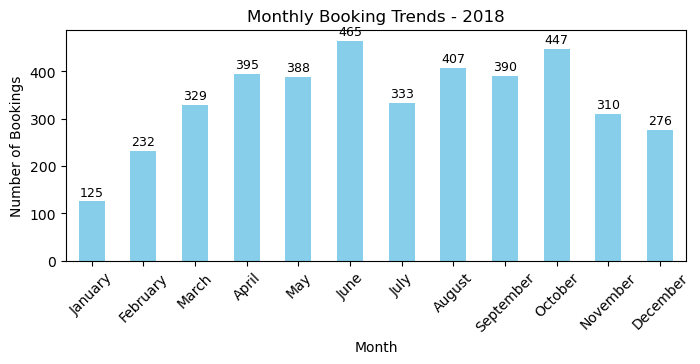

In [187]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

for year in df['Year'].unique():
    yearly_data = df[df['Year'] == year]
    monthly_bookings = yearly_data['Month'].value_counts().reindex(month_order)

    plt.figure(figsize=(8,3))
    bars = monthly_bookings.plot(kind='bar', color='skyblue')
    
    # Title and labels
    plt.title(f'Monthly Booking Trends - {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Bookings')
    plt.xticks(rotation=45)

    # Add value labels
    for i, value in enumerate(monthly_bookings):
        if pd.notna(value):  # to skip missing months
            plt.text(i, value + 5, str(int(value)), ha='center', va='bottom', fontsize=9)

    plt.show()

#### Insight :  
2017 : 
The hotel gained strong demand between August and October 2017 (likely tourist or business peak season).  
Late year saw fewer bookings (off-season). 
2018 : 
High bookings: Mid-year to early Q4 (June–October).  
Low bookings: Start and end of the year (Jan–Feb, Nov–Dec).  

This helps the hotel plan staffing, promotions, and pricing — e.g., offer discounts in low months or higher rates during peak months.  

In [191]:
# Which days of the week experience the highest and lowest bookings?
df['day_of_week'] = df['Date'].dt.day_name()
print(df['day_of_week'].value_counts())

Sunday       877
Monday       755
Saturday     729
Wednesday    685
Tuesday      683
Friday       649
Thursday     622
Name: day_of_week, dtype: int64


#### Insight : 
Most bookings were made for Sundays (877), followed by Mondays (755) and Saturdays (729). This shows that weekends and the start of the week are the busiest times for the hotel.  
Bookings are slightly lower on Fridays (649) and Thursdays (622), meaning weekdays are generally less busy. The pattern suggests that guests prefer weekend stays or extend their trips into Monday.  

In [192]:
# How do online and offline bookings differ in terms of volume and cancellation rates?
leadtime_seg = df.groupby('market_segment')['lead_time'].mean().reset_index()
print(leadtime_seg)

  market_segment  lead_time
0       Aviation   6.400000
1  Complementary  13.555556
2      Corporate  21.328244
3        Offline  85.655863
4         Online  91.284015


#### Insight : 
Online bookings (91 days) and Offline bookings (86 days) have the longest lead times.  
Guests book these rooms well in advance, likely for planned vacations or business trips.  
Corporate (21 days) and Complementary (14 days) segments book much closer to their stay dates  
These are often short-notice business or special bookings.  
Aviation (6 days) has the shortest lead time, which makes sense since airline crew stays are mostly last-minute or fixed contracts  

Most advance bookings come from online and offline channels, while corporate and aviation guests tend to book closer to their stay date.

In [12]:
# How do online and offline bookings differ in terms of volume and cancellation rates?
online = df[df['market_segment'] == 'Online']['status'].value_counts(normalize=True) * 100
offline = df[df['market_segment'] == 'Offline']['status'].value_counts(normalize=True) * 100
print("Online Market Segment:\n", online)
print("\nOffline Market Segment:\n", offline)

Online Market Segment:
 Not Cancelled    56.858407
Cancelled        43.141593
Name: status, dtype: float64

Offline Market Segment:
 Not Cancelled    100.0
Name: status, dtype: float64


In [216]:
# Most booked room types
df['room_type'].value_counts()

Room_Type 1    3885
Room_Type 4     833
Room_Type 6     120
Room_Type 2     106
Room_Type 5      31
Room_Type 7      23
Room_Type 3       2
Name: room_type, dtype: int64

In [223]:
# 6. Top-performing market segments
segment_perf = df['market_segment'].value_counts().reset_index(name='bookings')
print(segment_perf.head(3))

       index  bookings
0     Online      3616
1    Offline      1049
2  Corporate       262


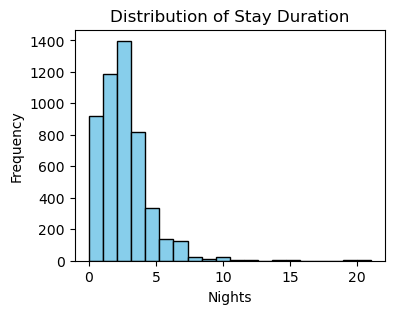

In [225]:
plt.figure(figsize=(4,3))
df['nights']=df['week_nights']+df['weekend_nights']
plt.hist(df['nights'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Stay Duration')
plt.xlabel('Nights')
plt.ylabel('Frequency')
plt.show()

The majority of guests stayed for 1 to 3 nights — the tallest bars are between these values.
This means short stays are most common.  
After around 5 nights, the number of stays drops sharply very few guests stay longer than that.  
A small number of guests stay for more than 10 nights, but such long stays are very rare.  

The hotel mainly serves short-term travelers likely business guests or weekend tourists.  
Marketing or package deals could target short-stay customers, since they form the largest portion.  
To increase revenue, the hotel might offer discounts for longer stays to attract more long-duration guests.  

In [ ]:
Which booking channels have the most cancellations?
How does room price affect cancellations?
How do special requests affect booking outcomes?

### Revenue & Pricing Analysis : 

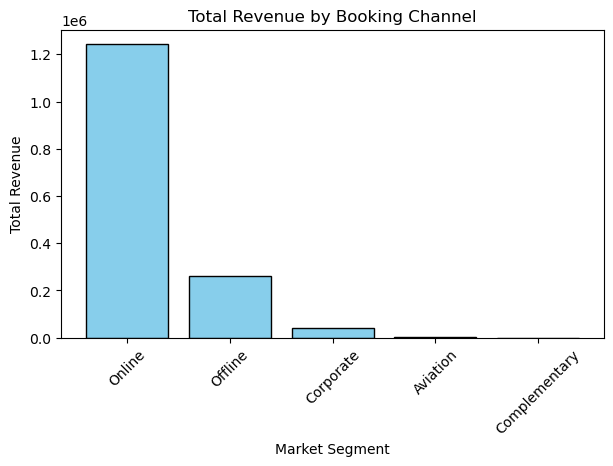

  market_segment  total_revenue
4         Online     1242019.14
3        Offline      260785.48
2      Corporate       39907.27
0       Aviation        3650.00
1  Complementary         565.99


In [231]:
# Which booking channels contribute the most to total revenue?
df['total_revenue'] = df['avg_room_price'] * (df['week_nights'] + df['weekend_nights'])

revenue_by_segment = df.groupby('market_segment')['total_revenue'].sum().reset_index().sort_values(by='total_revenue', ascending=False)

plt.figure(figsize=(7,3))
plt.bar(revenue_by_segment['market_segment'], revenue_by_segment['total_revenue'], color='skyblue', edgecolor='black')
plt.title('Total Revenue by Booking Channel')
plt.xlabel('Market Segment')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

print(revenue_by_segment)


In [232]:
# 2. How does average daily rate (ADR) vary by room type, season, and booking channel
adr = df.groupby(['room_type','market_segment'])['avg_room_price'].mean().reset_index()
print(adr)

      room_type market_segment  avg_room_price
0   Room_Type 1       Aviation       95.000000
1   Room_Type 1  Complementary        6.142195
2   Room_Type 1      Corporate       80.717878
3   Room_Type 1        Offline       88.709947
4   Room_Type 1         Online      101.126037
5   Room_Type 2  Complementary        0.228571
6   Room_Type 2        Offline       85.456667
7   Room_Type 2         Online       92.116222
8   Room_Type 3  Complementary        0.000000
9   Room_Type 3         Online       80.750000
10  Room_Type 4       Aviation      107.000000
11  Room_Type 4  Complementary        6.125000
12  Room_Type 4      Corporate       92.272727
13  Room_Type 4        Offline       81.338000
14  Room_Type 4         Online      132.542638
15  Room_Type 5      Corporate      122.995000
16  Room_Type 5        Offline      127.545455
17  Room_Type 5         Online      137.444286
18  Room_Type 6  Complementary        0.000000
19  Room_Type 6        Offline      153.800000
20  Room_Type

In [ ]:
resort_adr = df[df['hotel'] == 'Resort Hotel']['adr']
city_adr = df[df['hotel'] == 'City Hotel']['adr']

t_stat, p_val = stats.ttest_ind(resort_adr, city_adr)
print(f"T-Statistic: {t_stat:.2f}, P-Value: {p_val:.4f}")

if p_val < 0.05:
    print("Significant difference in ADR between hotel types.")
else:
    print("No significant difference in ADR between hotel types.")


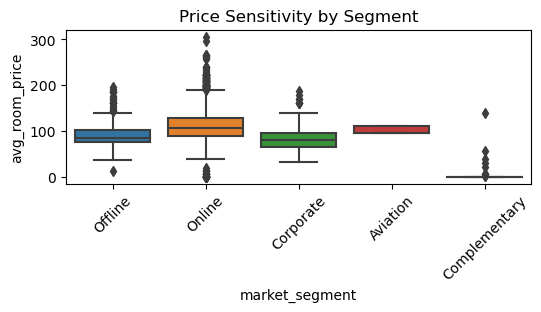

In [235]:
# How does price sensitivity differ among different booking channels or segments?
import seaborn as sns
plt.figure(figsize=(6,2))
sns.boxplot(x='market_segment', y='avg_room_price', data=df)
plt.title('Price Sensitivity by Segment')
plt.xticks(rotation=45)
plt.show()

In [244]:
# What is the revenue loss due to no-shows or cancellations?
rev_cust = df.groupby('market_segment')['total_revenue'].mean().reset_index().sort_values('total_revenue', ascending=False)
print(rev_cust)

  market_segment  total_revenue
0       Aviation     365.000000
4         Online     343.478744
3        Offline     248.603889
2      Corporate     152.317824
1  Complementary       8.983968


### Customer Behaviour & Segmentation : 

In [246]:
# What percentage of guests are repeat vs. first-time customers?
repeat_rate = df['repeated_guest'].value_counts(normalize=True) * 100
print(repeat_rate)

0    97.32
1     2.68
Name: repeated_guest, dtype: float64


In [247]:
# 2. Loyalty by segment
loyal_seg = df.groupby('market_segment')['repeated_guest'].mean().reset_index()
print(loyal_seg)

  market_segment  repeated_guest
0       Aviation        0.000000
1  Complementary        0.428571
2      Corporate        0.309160
3        Offline        0.013346
4         Online        0.003319


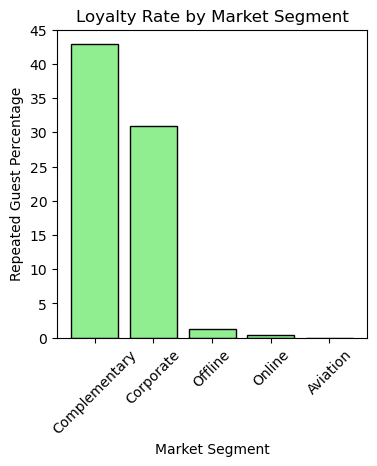

  market_segment  repeated_guest
1  Complementary        0.428571
2      Corporate        0.309160
3        Offline        0.013346
4         Online        0.003319
0       Aviation        0.000000


In [250]:
# Assuming 'is_repeated_guest' = 1 means loyal (repeated) guest
# and 0 means new guest

loyalty_segment = (df.groupby('market_segment')['repeated_guest'].mean().reset_index()
                   .sort_values(by='repeated_guest', ascending=False))

plt.figure(figsize=(4,4))
plt.bar(loyalty_segment['market_segment'], loyalty_segment['repeated_guest']*100,
        color='lightgreen', edgecolor='black')

plt.title('Loyalty Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Repeated Guest Percentage')
plt.xticks(rotation=45)
plt.show()

print(loyalty_segment)

In [255]:
# How do customer preferences (room type) differ among segments
bookings = df.groupby(['market_segment','room_type']).size().reset_index(name='bookings')
print(bookings.head(2))

  market_segment    room_type  bookings
0       Aviation  Room_Type 1         5
1       Aviation  Room_Type 4         5


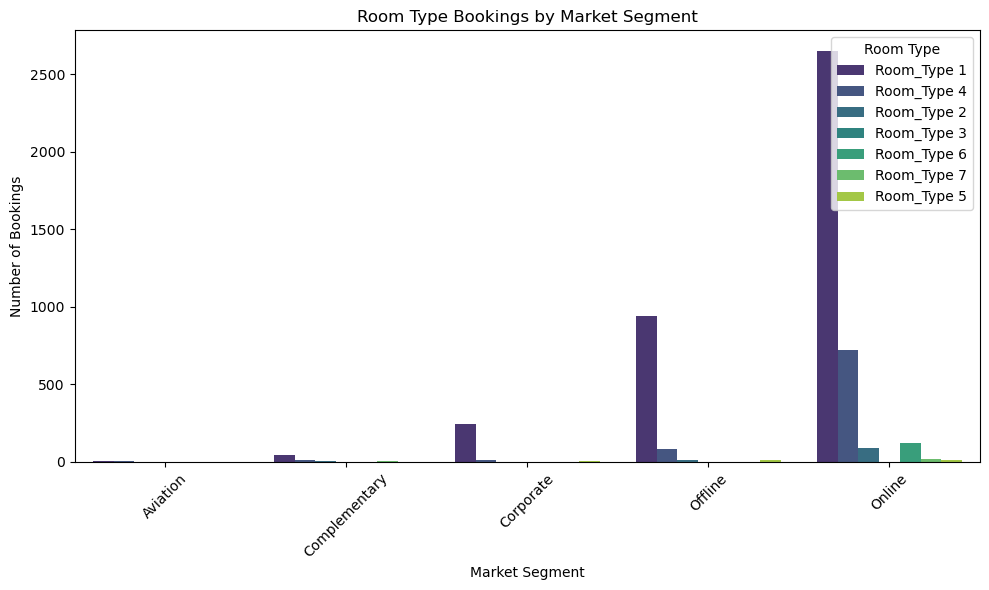

In [257]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(data=bookings, x='market_segment', y='bookings', hue='room_type', palette='viridis')
plt.title('Room Type Bookings by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

Most bookings come from Online and Offline segments, especially for Room Type 1.  
Corporate and Complementary guests tend to prefer Room Type 4 and 5, possibly due to budget or business needs.  
The hotel could adjust pricing or promotions based on which segment prefers which room type.  

In [259]:
# 5. Lead time by segment
lead_seg = df.groupby('market_segment')['lead_time'].mean().reset_index()
print(lead_seg)

  market_segment  lead_time
0       Aviation   6.400000
1  Complementary  13.555556
2      Corporate  21.328244
3        Offline  85.655863
4         Online  91.284015


### Cancellations & Operational Efficiency : 

In [ ]:
# Convert 'is_canceled' to numeric (1 for Cancelled, 0 for Not Cancelled)
df['status'] = df['status'].map({'Cancelled': 1, 'Not Cancelled': 0})

cancel_rate = df['status'].mean()
season_cancel = df.groupby(df['Date'].dt.month_name())['status'].mean().reset_index()
print("Overall cancel rate:", cancel_rate)
print(season_cancel)

In [ ]:
# 1. Overall and seasonal cancellation rate
cancel_rate = df['status'].mean()
season_cancel = df.groupby(df['Month'])['status'].mean().reset_index()
print("Overall cancel rate:", cancel_rate)
print(season_cancel)

In [22]:

# 3. Cancellation impact on revenue
rev_loss = df[df['status']==1]['total_revenue'].sum()
total_rev = df['total_revenue'].sum()
print("Revenue loss % due to cancellations:", rev_loss/total_rev*100)

Revenue loss % due to cancellations: 37.168032035210324
